In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

C:\Users\USER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv('Case Study - Customer.csv', delimiter = ';')
df2 = pd.read_csv('Case Study - Product.csv', delimiter = ';')
df3 = pd.read_csv('Case Study - Store.csv', delimiter = ';')
df4 = pd.read_csv('Case Study - Transaction.csv', delimiter = ';')
print(df4.head())
print(df1.head())

  TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328  01/01/2022        P3   7500    4        30000   
1       TR16356         165  01/01/2022        P9  10000    7        70000   
2        TR1984         183  01/01/2022        P1   8800    4        35200   
3       TR35256         160  01/01/2022        P1   8800    7        61600   
4       TR41231         386  01/01/2022        P9  10000    1        10000   

   StoreID  
0       12  
1        1  
2        4  
3        4  
4        4  
   CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   9,17
3           4   31       1        Married   4,87
4           5   58       1        Married   3,57


In [3]:
df = df4.merge(df1, on='CustomerID').merge(df2, on='ProductID').merge(df3, on='StoreID')
df

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,01/08/2022,P4,12000,3,36000,4,23,1,Single,"7,5",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5016,TR21587,425,17/10/2022,P4,12000,1,12000,4,58,1,Married,"7,22",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5017,TR51183,409,19/07/2022,P4,12000,1,12000,4,47,0,Married,"28,23",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5018,TR14963,374,16/12/2022,P4,12000,5,60000,4,32,0,Single,"5,4",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  Product Name    5020 non-null   object
 13  Price_y         5020 non-null   int64 
 14  StoreName       5020 non-null   object
 15  GroupStore      5020 non-null   object
 16  Type            5020 non-null   object
 17  Latitude        5020 non-null   object
 18  Longitud

In [5]:
# basen on SQL Query
def umur(x):
    if x < 30:
        return 'Single'
    else:
        return 'Married'

df['marital2'] = df['Age'].apply(umur)
#isi nan di kolom marital status
df['Marital Status'] = df['Marital Status'].fillna(df['marital2'])
df.isna().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_x           0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
Product Name      0
Price_y           0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
marital2          0
dtype: int64

In [6]:
df = df.drop(columns=['Latitude', 'Longitude', 'Price_y', 'marital2'], axis = 1)
df.columns

Index(['TransactionID', 'CustomerID', 'Date', 'ProductID', 'Price_x', 'Qty',
       'TotalAmount', 'StoreID', 'Age', 'Gender', 'Marital Status', 'Income',
       'Product Name', 'StoreName', 'GroupStore', 'Type'],
      dtype='object')

In [7]:
custcount = df['CustomerID'].value_counts().reset_index()
custcount

,index,CustomerID
0,156,21
1,392,20
2,365,20
3,44,19
4,13,19
...,...,...
442,385,4
443,180,4
444,259,4
445,371,4


ingin memisahkan kustomer yang loyal (datang tiap bulannya/lebih dari sama dengan 12) dan tidak loyal

In [8]:
# 1 loyal, 0 tidak loyal
def loyal(x):
    if x >= 12:
        return 1
    else :
        return 0

custcount['loyal'] = custcount['CustomerID'].apply(loyal)
custcount

,index,CustomerID,loyal
0,156,21,1
1,392,20,1
2,365,20,1
3,44,19,1
4,13,19,1
...,...,...,...
442,385,4,0
443,180,4,0
444,259,4,0
445,371,4,0


In [9]:
custcount = custcount.rename(columns = {'CustomerID': 'kunjungan', 'index':'CustomerID'})
custcount

,CustomerID,kunjungan,loyal
0,156,21,1
1,392,20,1
2,365,20,1
3,44,19,1
4,13,19,1
...,...,...,...
442,385,4,0
443,180,4,0
444,259,4,0
445,371,4,0


In [10]:
groupT = df.groupby(['CustomerID'])['TotalAmount'].median().reset_index()
groupT

,CustomerID,TotalAmount
0,1,32000.0
1,2,19200.0
2,3,28200.0
3,4,29100.0
4,5,45000.0
...,...,...
442,443,21000.0
443,444,23200.0
444,445,27300.0
445,446,32000.0


In [11]:
grouprod = df.groupby(['CustomerID'])['Product Name'].value_counts().unstack().reset_index().fillna(0)
grouprod

Product Name,CustomerID,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt
0,1,2.0,3.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0
1,2,1.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,5.0,1.0
2,3,0.0,1.0,1.0,3.0,4.0,1.0,1.0,1.0,3.0,0.0
3,4,0.0,0.0,1.0,2.0,3.0,2.0,0.0,0.0,2.0,0.0
4,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
442,443,2.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,5.0,1.0
443,444,3.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,0.0
444,445,3.0,1.0,1.0,4.0,0.0,3.0,1.0,1.0,4.0,0.0
445,446,0.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,1.0


In [12]:
cust = custcount.merge(df1, on='CustomerID').merge(grouprod, on = 'CustomerID').merge(groupT, on = 'CustomerID')
cust

,CustomerID,kunjungan,loyal,Age,Gender,Marital Status,Income,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,TotalAmount
0,156,21,1,44,0,Married,"3,87",0.0,4.0,0.0,2.0,2.0,1.0,3.0,1.0,4.0,4.0,21000.0
1,392,20,1,45,0,Married,"19,68",1.0,4.0,0.0,5.0,0.0,0.0,5.0,1.0,3.0,1.0,38800.0
2,365,20,1,28,0,Single,"6,05",4.0,6.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,34750.0
3,44,19,1,40,0,Married,"10,65",0.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,5.0,1.0,21000.0
4,13,19,1,23,0,Single,"2,03",1.0,3.0,2.0,1.0,1.0,0.0,2.0,2.0,5.0,2.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,385,4,0,41,1,Married,"15,84",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,36200.0
443,180,4,0,22,1,Married,"4,07",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,48200.0
444,259,4,0,59,1,Married,"4,44",0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,20800.0
445,371,4,0,25,0,Married,"3,06",0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,46500.0


In [13]:
cust = cust.rename(columns = {'TotalAmount':'avg amount'})

In [14]:
cust.columns

Index(['CustomerID', 'kunjungan', 'loyal', 'Age', 'Gender', 'Marital Status',
       'Income', 'Cashew', 'Cheese Stick', 'Choco Bar', 'Coffee Candy',
       'Crackers', 'Ginger Candy ', 'Oat', 'Potato Chip', 'Thai Tea',
       'Yoghurt', 'avg amount'],
      dtype='object')

In [15]:
cust['buytot'] = cust['Cashew'] + cust['Cheese Stick'] + cust['Coffee Candy'] + cust['Crackers'] + cust['Ginger Candy '] + cust['Oat'] + cust['Potato Chip'] + cust['Thai Tea'] + cust['Yoghurt']
cust

,CustomerID,kunjungan,loyal,Age,Gender,Marital Status,Income,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot
0,156,21,1,44,0,Married,"3,87",0.0,4.0,0.0,2.0,2.0,1.0,3.0,1.0,4.0,4.0,21000.0,21.0
1,392,20,1,45,0,Married,"19,68",1.0,4.0,0.0,5.0,0.0,0.0,5.0,1.0,3.0,1.0,38800.0,20.0
2,365,20,1,28,0,Single,"6,05",4.0,6.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,34750.0,17.0
3,44,19,1,40,0,Married,"10,65",0.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,5.0,1.0,21000.0,17.0
4,13,19,1,23,0,Single,"2,03",1.0,3.0,2.0,1.0,1.0,0.0,2.0,2.0,5.0,2.0,30000.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,385,4,0,41,1,Married,"15,84",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,36200.0,4.0
443,180,4,0,22,1,Married,"4,07",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,48200.0,4.0
444,259,4,0,59,1,Married,"4,44",0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,20800.0,4.0
445,371,4,0,25,0,Married,"3,06",0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,46500.0,4.0


disini kita ingin melihat bagaimana perilaku/ciri kustomer yang loyal dan tidak loyal

In [16]:
status_onehot = pd.get_dummies(cust["Marital Status"], prefix= '_')
cust = cust.join(status_onehot)
cust.head(2)

,CustomerID,kunjungan,loyal,Age,Gender,Marital Status,Income,Cashew,Cheese Stick,Choco Bar,...,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot,__Married,__Single
0,156,21,1,44,0,Married,"3,87",0.0,4.0,0.0,...,2.0,1.0,3.0,1.0,4.0,4.0,21000.0,21.0,1,0
1,392,20,1,45,0,Married,"19,68",1.0,4.0,0.0,...,0.0,0.0,5.0,1.0,3.0,1.0,38800.0,20.0,1,0


In [17]:
cust['Income'] = cust['Income'].str.replace(',', '.')
cust['Income'] = cust['Income'].astype('float')
cust['Income'] = cust['Income']*1000000
cust.head(2)

,CustomerID,kunjungan,loyal,Age,Gender,Marital Status,Income,Cashew,Cheese Stick,Choco Bar,...,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot,__Married,__Single
0,156,21,1,44,0,Married,3870000.0,0.0,4.0,0.0,...,2.0,1.0,3.0,1.0,4.0,4.0,21000.0,21.0,1,0
1,392,20,1,45,0,Married,19680000.0,1.0,4.0,0.0,...,0.0,0.0,5.0,1.0,3.0,1.0,38800.0,20.0,1,0


# Handle Outlier

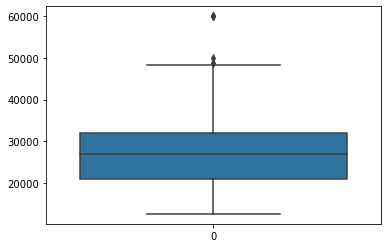

In [18]:
ax = sns.boxplot(data = cust['avg amount'])

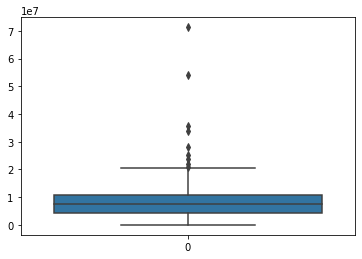

In [19]:
ax3 = sns.boxplot(data = cust['Income'])

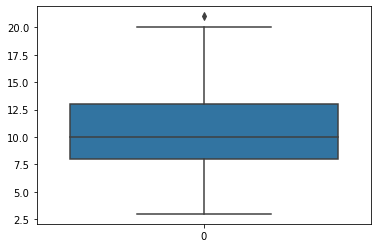

In [20]:
ax4 = sns.boxplot(data = cust['buytot'])

In [21]:
#making function to replace outlier
def outlier (x):
    sorted(x)
    q1, q3 = x.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5*IQR)
    upr_bound = q3 + (1.5*IQR)
    return lwr_bound, upr_bound

In [22]:
low, high = outlier(cust['Income'])
low2, high2 = outlier(cust['buytot'])
low3, high3 = outlier(cust['avg amount'])

In [23]:
#replacing outlier with upper bound and lower bound value
cust['Income'] = np.where(cust['Income']>high, high, cust['Income'])
cust['Income'] = np.where(cust['Income']<low, low, cust['Income'])
cust['buytot'] = np.where(cust['buytot']>high2, high2, cust['buytot'])
cust['buytot'] = np.where(cust['buytot']<low2, low2, cust['buytot'])
cust['avg amount'] = np.where(cust['avg amount']>high3, high3, cust['avg amount'])
cust['avg amount'] = np.where(cust['avg amount']<low3, low3, cust['avg amount'])

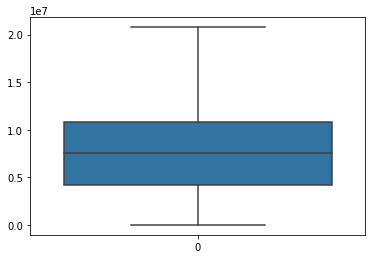

In [24]:
ax3 = sns.boxplot(data = cust['Income'])

# Regresi

In [25]:
cust['Income'] = cust['Income'].astype('float')
cust.dtypes

CustomerID          int64
kunjungan           int64
loyal               int64
Age                 int64
Gender              int64
Marital Status     object
Income            float64
Cashew            float64
Cheese Stick      float64
Choco Bar         float64
Coffee Candy      float64
Crackers          float64
Ginger Candy      float64
Oat               float64
Potato Chip       float64
Thai Tea          float64
Yoghurt           float64
avg amount        float64
buytot            float64
__Married           uint8
__Single            uint8
dtype: object

In [26]:
x = cust.drop(columns ={'CustomerID', 'kunjungan', 'loyal', 'Marital Status'}, axis = 1)
y = cust['loyal']
x.head(3)

,Age,Gender,Income,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt,avg amount,buytot,__Married,__Single
0,44,0,3870000.0,0.0,4.0,0.0,2.0,2.0,1.0,3.0,1.0,4.0,4.0,21000.0,20.5,1,0
1,45,0,19680000.0,1.0,4.0,0.0,5.0,0.0,0.0,5.0,1.0,3.0,1.0,38800.0,20.0,1,0
2,28,0,6050000.0,4.0,6.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,34750.0,17.0,0,1


In [27]:
from sklearn.model_selection import train_test_split

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
#persiapan
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba_test = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred_test))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_test))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred_test))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba_test[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, x_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

## Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [30]:
#validasi
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.15


In [31]:
eval_classification(rf_model)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.98
Precision (Test Set): 0.98
Recall (Test Set): 0.97
F1-Score (Test Set): 0.98
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9852469392469392


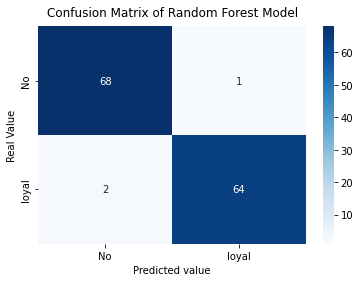

In [32]:
# Buat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'loyal'],
            yticklabels=['No', 'loyal'])
plt.xlabel('Predicted value')
plt.ylabel('Real Value')
plt.title('Confusion Matrix of Random Forest Model', pad = 10)
plt.show()

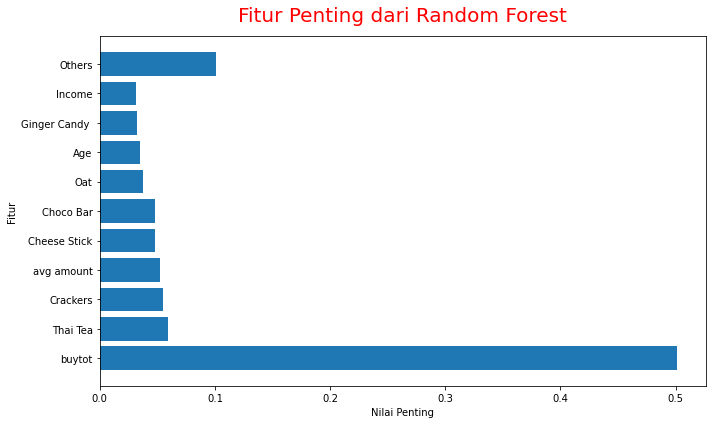

In [33]:
# Dapatkan fitur-fitur penting dari model
feature_importances = rf_model.feature_importances_

# Urutkan fitur-fitur penting dalam urutan menurun
sorted_indices = feature_importances.argsort()[::-1]

top_n = 10

# Tampilkan fitur-fitur penting
top_features = [x.columns[idx] for idx in sorted_indices[:top_n]]
other_features = [x.columns[idx] for idx in sorted_indices[top_n:]]

# Menggabungkan "Others" untuk fitur yang tidak termasuk dalam top 10
feature_labels = top_features + ['Others']
feature_importances = [feature_importances[idx] for idx in sorted_indices[:top_n]] + [sum(feature_importances[idx] for idx in sorted_indices[top_n:])]

# Visualisasikan fitur-fitur penting
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_labels)), feature_importances)
plt.yticks(range(len(feature_labels)), feature_labels)
plt.xlabel('Nilai Penting')
plt.ylabel('Fitur')
plt.title('Fitur Penting dari Random Forest',  pad = 15, fontsize = 20, color = 'red')
plt.tight_layout()
plt.show()

## Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

In [35]:
#validasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.12


In [36]:
eval_classification(dt_model)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.97
F1-Score (Test Set): 0.98
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9905195195195194


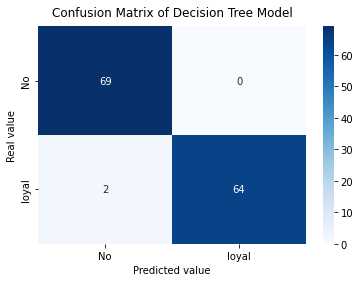

In [39]:
# Buat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'loyal'],
            yticklabels=['No', 'loyal'])
plt.xlabel('Predicted value')
plt.ylabel('Real value')
plt.title('Confusion Matrix of Decision Tree Model', pad = 10)
plt.show()

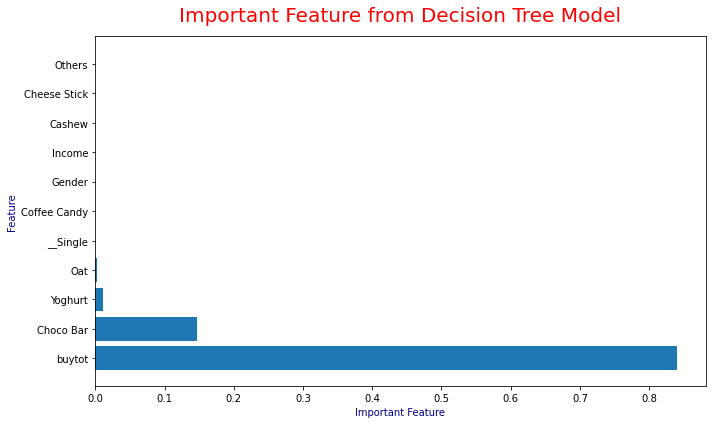

In [41]:
# Dapatkan fitur-fitur penting dari model
feature_importances = dt_model.feature_importances_

# Urutkan fitur-fitur penting dalam urutan menurun
sorted_indices = feature_importances.argsort()[::-1]

top_n = 10

# Tampilkan fitur-fitur penting
top_features = [x.columns[idx] for idx in sorted_indices[:top_n]]
other_features = [x.columns[idx] for idx in sorted_indices[top_n:]]

# Menggabungkan "Others" untuk fitur yang tidak termasuk dalam top 10
feature_labels = top_features + ['Others']
feature_importances = [feature_importances[idx] for idx in sorted_indices[:top_n]] + [sum(feature_importances[idx] for idx in sorted_indices[top_n:])]

# Visualisasikan fitur-fitur penting
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_labels)), feature_importances)
plt.yticks(range(len(feature_labels)), feature_labels)
plt.xlabel('Important Feature', color = 'darkblue')
plt.ylabel('Feature', color = 'darkblue')
plt.title('Important Feature from Decision Tree Model',  pad = 15, fontsize = 20, color = 'red')
plt.tight_layout()
plt.show()

In [43]:
cust['avg amount'].mean()

27802.74049217002

In [44]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)